# **Gunshot sound detection using ResNet50**

Connecting the google colab with google drive to store and use the audio dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import sys


Forming a panda dataframe from the metadata file (Additional gunshot data has added to the existing metadata file, to avoid the imbalance dataset problem)

In [ ]:

metadata=pd.read_csv("/content/drive/MyDrive/Audio_meta_data/ModifiedDLMetacsv.csv")
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032.0,0.0,0.317551,1.0,5,3,dog_bark
1,100263-2-0-117.wav,100263.0,58.5,62.500000,1.0,5,2,children_playing
2,100263-2-0-121.wav,100263.0,60.5,64.500000,1.0,5,2,children_playing
3,100263-2-0-126.wav,100263.0,63.0,67.000000,1.0,5,2,children_playing
4,100263-2-0-137.wav,100263.0,68.5,72.500000,1.0,5,2,children_playing
...,...,...,...,...,...,...,...,...
9578,9 (78).wav,NaN,NaN,NaN,NaN,19,6,gun_shot
9579,9 (79).wav,NaN,NaN,NaN,NaN,19,6,gun_shot
9580,9 (80).wav,NaN,NaN,NaN,NaN,19,6,gun_shot
9581,9 (81).wav,NaN,NaN,NaN,NaN,19,6,gun_shot


Identifying the unique classes

In [ ]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

Installing librosa library to read the audio files

In [ ]:
!pip install librosa

# Exploratory Data Analysis

Analysing the audio files of different categories using the librosa library

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
### Gunshot sound
filename_gunshot='/content/drive/MyDrive/Audio_dataset/audio/fold15/5 (1).wav'

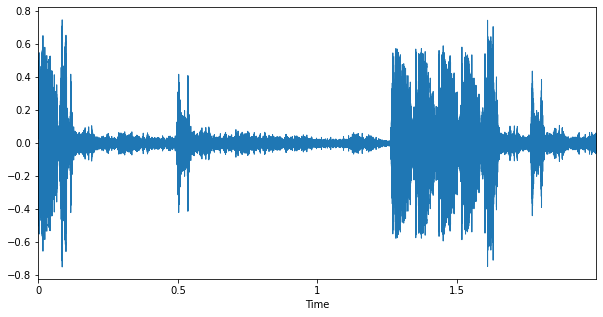

In [ ]:
plt.figure(figsize=(10,5))
data,sample_rate=librosa.load(filename_gunshot)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename_gunshot)

In [ ]:
### street music
filename_streetMusic='/content/drive/MyDrive/Audio_dataset/27070-2-0-3.wav'

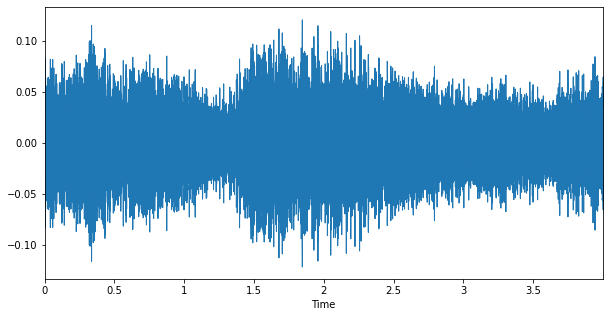

In [ ]:

plt.figure(figsize=(10,5))
data,sample_rate=librosa.load(filename_streetMusic)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename_streetMusic)

In [ ]:
### car horn
filename_carHorn='/content/drive/MyDrive/Audio_dataset/99812-1-3-0.wav'

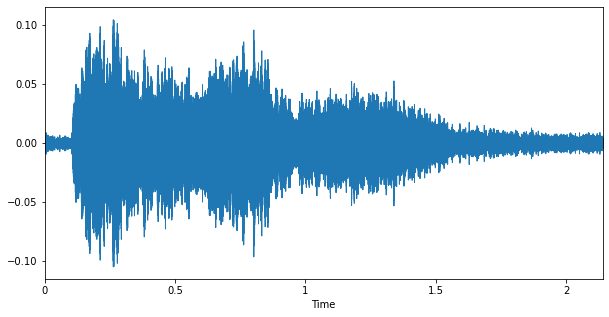

In [ ]:

plt.figure(figsize=(10,5))
data,sample_rate=librosa.load(filename_carHorn)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename_carHorn)

In [ ]:
### drilling
filename_drilling='/content/drive/MyDrive/Audio_dataset/24364-4-0-11.wav'

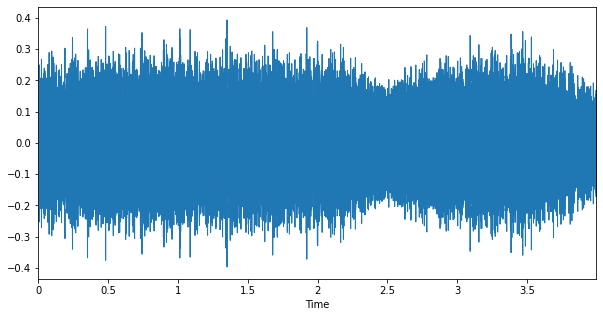

In [ ]:

plt.figure(figsize=(10,5))
data,sample_rate=librosa.load(filename_drilling)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename_drilling)

Analysing the mel-spectrograms of various audio files using the librosa library 

In [ ]:
# Example1:mel-spectrogram of gunshot
y, sample_rate = librosa.load('/content/drive/MyDrive/Audio_dataset/audio/fold15/5 (1).wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sample_rate)
ps.shape


(128, 87)

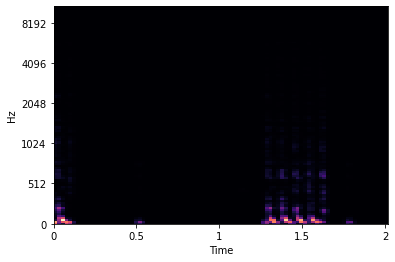

In [ ]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [ ]:
# Example2:mel-spectrogram of street music
y, sample_rate = librosa.load('/content/drive/MyDrive/Audio_dataset/7390-9-0-6.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sample_rate)
ps.shape

(128, 128)

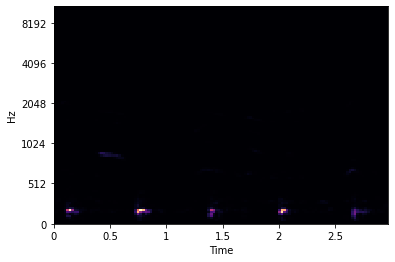

In [ ]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [ ]:
# Example3:mel-spectrogram of car-horn 
y, sample_rate = librosa.load('/content/drive/MyDrive/Audio_dataset/99812-1-3-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sample_rate)
ps.shape

(128, 93)

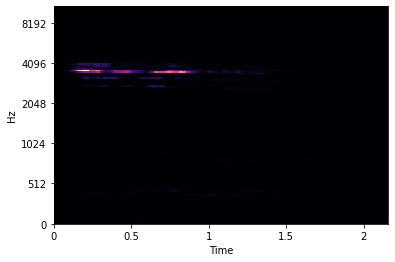

In [ ]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [ ]:
# Example4:mel-spectrogram of drilling 
y, sample_rate = librosa.load('/content/drive/MyDrive/Audio_dataset/24364-4-0-11.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sample_rate)
ps.shape

(128, 128)

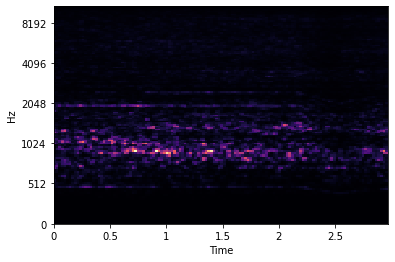

In [ ]:

librosa.display.specshow(ps, y_axis='mel', x_axis='time')

# Data-preprocessing

Replacing the classes which are not gun_shot with 'no_gun_shot' tag and vice versa by modifying the metadata file





In [ ]:
new_metadata = metadata.copy()
new_metadata.loc[metadata["class"] != "gun_shot", "classID"] = 0
new_metadata.loc[metadata["class"] == "gun_shot", "classID"] = 1

In [ ]:
new_metadata.to_csv(r"/content/drive/MyDrive/Audio_meta_data/UrbanSound8K-modified.csv")

In [ ]:
metadata_path = r"/content/drive/MyDrive/Audio_meta_data/UrbanSound8K-modified.csv"
metadata = pd.read_csv(metadata_path)

new_metadata = metadata.copy()
new_metadata.loc[metadata["classID"] == 0, "class"] = 'no gun_shot'
new_metadata.loc[metadata["classID"] == 1, "class"] = 'gun_shot'
new_metadata.groupby("classID").count()

,Unnamed: 0,slice_file_name,fsID,start,end,salience,fold,class
classID,,,,,,,,
0,8358,8358,8358,8358,8358,8358,8358,8358
1,1225,1225,374,374,374,374,1225,1225


In [ ]:
new_metadata.to_csv(r"/content/drive/MyDrive/Audio_meta_data/UrbanSound8K-modified1.csv")

In [ ]:
new_metadata.groupby("classID").count()

,Unnamed: 0,slice_file_name,fsID,start,end,salience,fold,class
classID,,,,,,,,
0,8358,8358,8358,8358,8358,8358,8358,8358
1,1225,1225,374,374,374,374,1225,1225


Reading the modified metadata files and seperating the dataframe into two seperate dataframes for 'gunshot and 'no-gunshot'

In [ ]:
import pandas as pd
import os
import librosa
import librosa.display
audio_dataset_path='/content/drive/MyDrive/Audio_dataset/audio/'
altered_metadata=pd.read_csv('/content/drive/MyDrive/Audio_meta_data/UrbanSound8K-modified1.csv')
altered_metadata.head()

,Unnamed: 0,Unnamed: 0.1,slice_file_name,fsID,start,end,salience,fold,classID,class
0,0,0,100032-3-0-0.wav,100032.0,0.0,0.317551,1.0,5,0,no gun_shot
1,1,1,100263-2-0-117.wav,100263.0,58.5,62.500000,1.0,5,0,no gun_shot
2,2,2,100263-2-0-121.wav,100263.0,60.5,64.500000,1.0,5,0,no gun_shot
3,3,3,100263-2-0-126.wav,100263.0,63.0,67.000000,1.0,5,0,no gun_shot
4,4,4,100263-2-0-137.wav,100263.0,68.5,72.500000,1.0,5,0,no gun_shot


In [ ]:
#Checking the number of rows and columns of the dataset
print(altered_metadata.shape)

(9583, 10)


In [ ]:
altered_metadata['path'] = 'fold' + altered_metadata['fold'].astype('str') + '/' + altered_metadata['slice_file_name'].astype('str')
altered_metadata.head()

,Unnamed: 0,Unnamed: 0.1,slice_file_name,fsID,start,end,salience,fold,classID,class,path
0,0,0,100032-3-0-0.wav,100032.0,0.0,0.317551,1.0,5,0,no gun_shot,fold5/100032-3-0-0.wav
1,1,1,100263-2-0-117.wav,100263.0,58.5,62.500000,1.0,5,0,no gun_shot,fold5/100263-2-0-117.wav
2,2,2,100263-2-0-121.wav,100263.0,60.5,64.500000,1.0,5,0,no gun_shot,fold5/100263-2-0-121.wav
3,3,3,100263-2-0-126.wav,100263.0,63.0,67.000000,1.0,5,0,no gun_shot,fold5/100263-2-0-126.wav
4,4,4,100263-2-0-137.wav,100263.0,68.5,72.500000,1.0,5,0,no gun_shot,fold5/100263-2-0-137.wav


In [ ]:
df_nogunshot=altered_metadata[altered_metadata['classID']==0]
df_gunshot=altered_metadata[altered_metadata['classID']==1]

print('the count of non-gunshot dataset:',len(df_nogunshot))
print('the count of gunshot dataset:',len(df_gunshot))

the count of non-gunshot dataset: 8358
the count of gunshot dataset: 1225


In [ ]:
df_nogunshot.head()

,Unnamed: 0,Unnamed: 0.1,slice_file_name,fsID,start,end,salience,fold,classID,class,path
0,0,0,100032-3-0-0.wav,100032.0,0.0,0.317551,1.0,5,0,no gun_shot,fold5/100032-3-0-0.wav
1,1,1,100263-2-0-117.wav,100263.0,58.5,62.500000,1.0,5,0,no gun_shot,fold5/100263-2-0-117.wav
2,2,2,100263-2-0-121.wav,100263.0,60.5,64.500000,1.0,5,0,no gun_shot,fold5/100263-2-0-121.wav
3,3,3,100263-2-0-126.wav,100263.0,63.0,67.000000,1.0,5,0,no gun_shot,fold5/100263-2-0-126.wav
4,4,4,100263-2-0-137.wav,100263.0,68.5,72.500000,1.0,5,0,no gun_shot,fold5/100263-2-0-137.wav


In [ ]:
#Checking the number of rows and columns of the dataset
print(df_nogunshot.shape)

(8358, 11)


Consider random 2000 data rows from the nogunshot dataset, to avoid the imbalance of the two classes.

In [ ]:
df_nogunshot=df_nogunshot.sample(2000)
df_nogunshot.head()

,Unnamed: 0,Unnamed: 0.1,slice_file_name,fsID,start,end,salience,fold,classID,class,path
8060,8060,8060,78360-4-0-0.wav,78360.0,0.000000,4.000000,1.0,1,0,no gun_shot,fold1/78360-4-0-0.wav
8106,8106,8106,79089-0-0-134.wav,79089.0,76.664375,80.664375,2.0,9,0,no gun_shot,fold9/79089-0-0-134.wav
3938,3938,3938,177729-0-0-80.wav,177729.0,40.000000,44.000000,2.0,7,0,no gun_shot,fold7/177729-0-0-80.wav
949,949,949,119449-5-0-5.wav,119449.0,3.881958,7.881958,1.0,9,0,no gun_shot,fold9/119449-5-0-5.wav
8244,8244,8244,83502-0-0-13.wav,83502.0,6.500000,10.500000,2.0,10,0,no gun_shot,fold10/83502-0-0-13.wav


In [ ]:
#Checking the number of rows and columns of the dataset
print(df_nogunshot.shape)

(2000, 11)


In [ ]:
df_gunshot.head()

,Unnamed: 0,Unnamed: 0.1,slice_file_name,fsID,start,end,salience,fold,classID,class,path
106,106,106,102305-6-0-0.wav,102305.0,0.000000,2.611610,1.0,1,1,gun_shot,fold1/102305-6-0-0.wav
496,496,496,106955-6-0-0.wav,106955.0,0.495575,1.649031,1.0,9,1,gun_shot,fold9/106955-6-0-0.wav
611,611,611,110622-6-0-0.wav,110622.0,0.000000,1.501211,1.0,3,1,gun_shot,fold3/110622-6-0-0.wav
626,626,626,111048-6-0-0.wav,111048.0,0.000000,1.314579,1.0,6,1,gun_shot,fold6/111048-6-0-0.wav
1000,1000,1000,122690-6-0-0.wav,122690.0,12.231953,15.377840,1.0,1,1,gun_shot,fold1/122690-6-0-0.wav


In [ ]:
#Checking the number of rows and columns of the dataset
print(df_gunshot.shape)

(1225, 11)


Join the 'gunshot' and the 'nogunshot' dataframe into single dataframe to extract the features

In [ ]:
joined_metadata=df_nogunshot.append(df_gunshot)
joined_metadata.head()


,Unnamed: 0,Unnamed: 0.1,slice_file_name,fsID,start,end,salience,fold,classID,class,path
8060,8060,8060,78360-4-0-0.wav,78360.0,0.000000,4.000000,1.0,1,0,no gun_shot,fold1/78360-4-0-0.wav
8106,8106,8106,79089-0-0-134.wav,79089.0,76.664375,80.664375,2.0,9,0,no gun_shot,fold9/79089-0-0-134.wav
3938,3938,3938,177729-0-0-80.wav,177729.0,40.000000,44.000000,2.0,7,0,no gun_shot,fold7/177729-0-0-80.wav
949,949,949,119449-5-0-5.wav,119449.0,3.881958,7.881958,1.0,9,0,no gun_shot,fold9/119449-5-0-5.wav
8244,8244,8244,83502-0-0-13.wav,83502.0,6.500000,10.500000,2.0,10,0,no gun_shot,fold10/83502-0-0-13.wav


In [ ]:
#Checking the number of rows and columns of the dataset
print(joined_metadata.shape)

(3225, 11)


Shuffle the merged dataframe inorder to avoid the sequence in the dataset.

In [ ]:
from sklearn.utils import shuffle
df = shuffle(joined_metadata)
df.head()

,Unnamed: 0,Unnamed: 0.1,slice_file_name,fsID,start,end,salience,fold,classID,class,path
2268,2268,2268,155243-9-0-32.wav,155243.0,16.000000,20.000000,2.0,5,0,no gun_shot,fold5/155243-9-0-32.wav
1715,1715,1715,144068-5-0-0.wav,144068.0,22.794739,26.794739,1.0,3,0,no gun_shot,fold3/144068-5-0-0.wav
7033,7033,7033,61503-2-0-7.wav,61503.0,3.500000,7.500000,1.0,7,0,no gun_shot,fold7/61503-2-0-7.wav
9340,9340,9340,7 (40).wav,NaN,NaN,NaN,NaN,17,1,gun_shot,fold17/7 (40).wav
4034,4034,4034,178497-3-0-3.wav,178497.0,1.500000,5.500000,1.0,5,0,no gun_shot,fold5/178497-3-0-3.wav


Extracting the features of the melspectrogram and storing it as pickled file mainly to avoid re-run and also to save time

In [ ]:
dataset_new = [] 
for row in df.itertuples():
    y, sample_rate = librosa.load('/content/drive/MyDrive/Audio_dataset/audio/' + row.path,duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sample_rate)
    if ps.shape != (128, 128): 
      continue
    dataset_new.append((ps, row.classID))

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


In [ ]:
import pickle
import os

In [ ]:
pickle.dump(dataset_new,open("/content/drive/MyDrive/Audio_dataset/dataset.dat","wb"))

In [ ]:
dataset_feature=pickle.load(open("/content/drive/MyDrive/Audio_dataset/dataset.dat","rb"))

Converting extracted_features into Pandas dataframe

In [ ]:
df_dataset_feature=pd.DataFrame(dataset_feature,columns=['feature','classID'])
df_dataset_feature

,feature,classID
0,"[[2.0347385, 1.009795, 0.39555582, 0.28860816,...",0
1,"[[0.9864044, 0.5853193, 2.9919965, 3.7158923, ...",0
2,"[[0.0100000305, 0.018046185, 0.011115582, 0.00...",0
3,"[[2.0988574e-07, 2.93396e-07, 1.3904949e-07, 1...",0
4,"[[63.155685, 31.189953, 97.08197, 381.724, 214...",1
...,...,...
1810,"[[51.893684, 36.051937, 23.42504, 34.401142, 4...",0
1811,"[[9.775112, 14.2243185, 6.281946, 10.449493, 1...",0
1812,"[[0.19597054, 0.09265897, 0.067401096, 0.06089...",0
1813,"[[0.0077458518, 0.011695721, 0.016967252, 0.01...",0


Importing the tensorflow library

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
import random
import tensorflow 
import tensorflow.keras as K
print(tensorflow.__version__)

2.7.0


Splitting the dataset into independent and dependent dataset

In [ ]:
X=np.array(df_dataset_feature['feature'].tolist())
y=np.array(df_dataset_feature['classID'].tolist())

Creating label-encoder to convert the classes to our requirement

In [ ]:

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))


Splitting the data into train & test data in 8:2 ratio




In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)

Reshaping the data to make it compatible for the CNN input

In [ ]:
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])


In [ ]:
print("The number of rows and columns in the independent training dataset post split is:",len(X_train))
print("The number of rows and columns in the dependent training dataset post split is:",len(y_train))
print("The number of rows and columns in the independent test dataset post split is:",len(X_test))
print("The number of rows and columns in the independent test dataset post split is:",len(y_test))

The number of rows and columns in the independent training dataset post split is: 1452
The number of rows and columns in the dependent training dataset post split is: 1452
The number of rows and columns in the independent test dataset post split is: 363
The number of rows and columns in the independent test dataset post split is: 363


Printing the shape of train and test records

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1452, 128, 128, 1)
(1452, 2)
(363, 128, 128, 1)
(363, 2)


## **Modelling**

Bulding a ResNet50 network(model) from scratch

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Add, Dense, Activation,Flatten, ZeroPadding2D, BatchNormalization, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from sklearn import metrics

def identity_block(X,f, filters):
  f1,f2,f3=filters
  X_shortcut=X


  #Three layers which will be skipped
  X=Conv2D(filters=f1, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer = glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3)(X)
  X=Activation('relu')(X)

  X=Conv2D(filters=f2, kernel_size=(f, f), strides=(1,1), padding='same', kernel_initializer = glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3)(X)
  X=Activation('relu')(X)

  X=Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer = glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3)(X)

  # X travels  via layers but X_shortcut is the original input which needs to be added.
  X=Add()([X,X_shortcut])
  X=Activation('relu')(X)  #To avoid vanishing gradient problem

  return X


In [ ]:
def conv_block(X,f,filters,s=2):
  f1,f2,f3=filters
  X_shortcut=X

  X=Conv2D(filters=f1, kernel_size=(1,1), strides=(s,s),kernel_initializer = glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3)(X)
  X=Activation('relu')(X)

  X=Conv2D(filters=f2, kernel_size=(f,f), strides=(1,1), padding='same',kernel_initializer = glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3)(X)
  X=Activation('relu')(X)

  X=Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid',kernel_initializer = glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3)(X)

  X_shortcut=Conv2D(filters=f3, kernel_size=(1,1), strides=(s,s), padding='valid', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
  X_shortcut=BatchNormalization(axis=3)(X_shortcut)

  X=Add()([X,X_shortcut])
  X=Activation('relu')(X)

  return X

In [ ]:
def ResNet50(pretrained=False,input_shape=(128, 128, 1),classes=2):
  X_input=Input(input_shape)
  #dropout = Dropout(0.4)
  X=ZeroPadding2D((3,3))(X_input)

  X=Conv2D(64,kernel_size=(7,7),strides=(2,2), kernel_initializer = glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3)(X)
  X=Activation('relu')(X)
  X=MaxPooling2D((3,3),strides=(2,2))(X)
  #X=dropout(X)

  X=conv_block(X,f=3,filters=[64,64,256],s=1)
  X=identity_block(X,3,[64,64,256])
  X=identity_block(X,3,[64,64,256])

  X=conv_block(X,f=3,filters=[128,128,512],s=2)
  X=identity_block(X,3,[128,128,512])
  X=identity_block(X,3,[128,128,512])
  X=identity_block(X,3,[128,128,512])

  X=conv_block(X,f=3,filters=[256,256,1024],s=2)
  X=identity_block(X,3,[256,256,1024])
  X=identity_block(X,3,[256,256,1024])
  X=identity_block(X,3,[256,256,1024])
  X=identity_block(X,3,[256,256,1024])
  X=identity_block(X,3,[256,256,1024])


  X=conv_block(X,f=3,filters=[512,512,2048],s=2)
  X=identity_block(X,3,[512,512,2048])
  X=identity_block(X,3,[512,512,2048])

  X=AveragePooling2D((2,2), name="avg_pool")(X)

  X=Flatten()(X)
  X=Dense(classes, activation='sigmoid',name="fc"+str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
  model=Model(inputs=X_input,outputs=X, name='ResNet50')
  
  return model
  

In [ ]:
my_RestNet50_model = ResNet50()

Adjusting the learning rate to 0.001 and attaching the relevant optimizer for our ResNet50 model, which is Adam. Additionally, 'binary_crossentropy' is used as a loss function, since the activation function used is 'sigmoid' for the binary classification.

In [ ]:
optimizer=tensorflow.keras.optimizers.Adam (learning_rate=0.001)  
my_RestNet50_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) 

In [ ]:
print(my_RestNet50_model.summary())

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 134, 134, 1)  0          ['input_13[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_537 (Conv2D)            (None, 64, 64, 64)   3200        ['zero_padding2d_12[0][0]']      
                                                                                           

Post compilation, model is trained with the training and validation dataset. 

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

epoch=12
metric = 'val_loss'
check_point=ModelCheckpoint(filepath=r"/content/drive/MyDrive/Audio_meta_data/model_save/Resnet50_model1.hdf5", monitor=metric, verbose=1, save_best_only=True, mode='min')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto',restore_best_weights=True)
start = datetime.now()

prediction = my_RestNet50_model.fit(X_train, y_train,batch_size=128,epochs=epoch, validation_split=0.2, callbacks=[check_point,monitor], verbose=1) 

Epoch 1/12
 9/10 [==========================>...] - ETA: 0s - loss: 0.0617 - accuracy: 0.9852
Epoch 00001: val_loss improved from inf to 0.07244, saving model to /content/drive/MyDrive/Audio_meta_data/model_save/Resnet50_model1.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


10/10 [==============================] - 6s 608ms/step - loss: 0.0615 - accuracy: 0.9854 - val_loss: 0.0724 - val_accuracy: 0.9863
Epoch 2/12
 9/10 [==========================>...] - ETA: 0s - loss: 0.0561 - accuracy: 0.9861
Epoch 00002: val_loss improved from 0.07244 to 0.04550, saving model to /content/drive/MyDrive/Audio_meta_data/model_save/Resnet50_model1.hdf5
10/10 [==============================] - 4s 389ms/step - loss: 0.0557 - accuracy: 0.9862 - val_loss: 0.0455 - val_accuracy: 0.9897
Epoch 3/12
 9/10 [==========================>...] - ETA: 0s - loss: 0.0488 - accuracy: 0.9905
Epoch 00003: val_loss improved from 0.04550 to 0.04169, saving model to /content/drive/MyDrive/Audio_meta_data/model_save/Resnet50_model1.hdf5
10/10 [==============================] - 4s 390ms/step - loss: 0.0495 - accuracy: 0.9897 - val_loss: 0.0417 - val_accuracy: 0.9931
Epoch 4/12
 9/10 [==========================>...] - ETA: 0s - loss: 0.0706 - accuracy: 0.9826
Epoch 00004: val_loss did not improve f

Plotting of the training loss vs validation loss

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

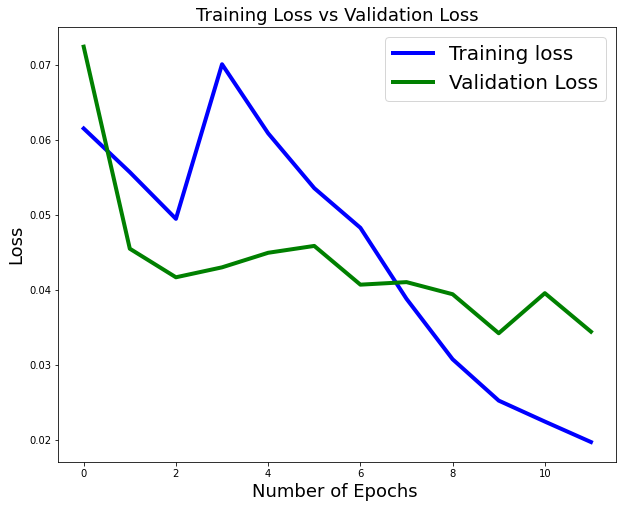

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(prediction.history['loss'],'b',linewidth=4)
plt.plot(prediction.history['val_loss'],'g',linewidth=4)
plt.legend(['Training loss', 'Validation Loss'],fontsize=20)
plt.xlabel('Number of Epochs ',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.title('Training Loss vs Validation Loss',fontsize=18)

Plotting of the training accuracy vs validation accuracy

Text(0.5, 1.0, 'Training accuracy vs Validation accuracy')

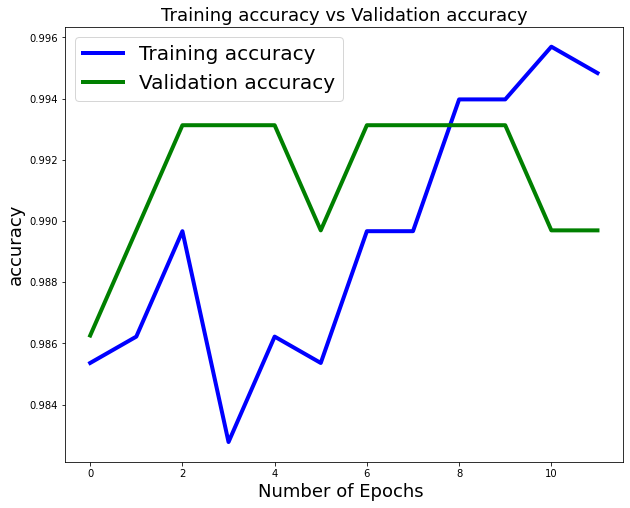

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(prediction.history['accuracy'],'b',linewidth=4)
plt.plot(prediction.history['val_accuracy'],'g',linewidth=4)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=20)
plt.xlabel('Number of Epochs ',fontsize=18)
plt.ylabel('accuracy',fontsize=18)

plt.title('Training accuracy vs Validation accuracy',fontsize=18)

## Test accuracy and loss

Finding the accuracy and loss on the test dataset

In [ ]:
test_prediction = my_RestNet50_model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (my_RestNet50_model.metrics_names[1], test_prediction[1]*100))
print("Loss: %.2f%%" %((test_prediction[0]*100)))

12/12 [==============================] - 0s 25ms/step - loss: 0.0350 - accuracy: 0.9917
accuracy: 99.17%
Loss: 3.50%


# Evaluation Metrics

Creation of certain evaluation metrics such as ROC curve, confusion matrics, classfication report, precision, recall and f1-score to evaluate the model's performance based on the test dataset

In [ ]:
#Changing the 2D array to 1D for compatibility.
import numpy as np
rounded_ytest=np.argmax(y_test, axis=1)
print(rounded_ytest.shape)

(363,)


In [ ]:
# generate a majority class prediction 
ns_probs = [0 for _ in range(len(rounded_ytest))]

In [ ]:
# predict probabilities
yhat_probs = my_RestNet50_model.predict_on_batch(X_test)


In [ ]:
# keeping the probabilities for the positive outcome only
yhat_probs = yhat_probs[:, 1]

In [ ]:
# calculating the scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_AUC = roc_auc_score(rounded_ytest, ns_probs)
yhat_probs_AUC = roc_auc_score(rounded_ytest, yhat_probs)

In [ ]:
# summarize scores
print('Majority class ROC_AUC : %.3f' % (ns_AUC))
print('ResNet ROC_AUC : %.3f' % (yhat_probs_AUC))

Majority class ROC_AUC : 0.500
ResNet ROC_AUC : 0.822


In [ ]:
# calculate the roc curve values
ns_fpr, ns_tpr, _ = roc_curve(rounded_ytest, ns_probs)
yhat_fpr, yhat_tpr, _ = roc_curve(rounded_ytest, yhat_probs)

Plot the ROC curve 

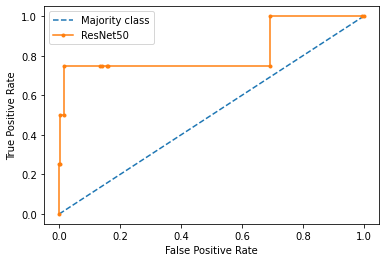

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Majority class')
plt.plot(yhat_fpr, yhat_tpr, marker='.', label='ResNet50')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#Prediction of lables for the unseen dataset
y_pred=my_RestNet50_model.predict(X_test)
y_pred[:5]

array([[1.0000000e+00, 1.0614938e-30],
       [9.9488199e-01, 6.6690040e-03],
       [9.9597186e-01, 5.1013255e-03],
       [9.9492353e-01, 6.6055167e-03],
       [9.9477011e-01, 6.8250736e-03]], dtype=float32)

Confusion matrix (Note: Gushot=1 and NoGunshot=0)

[Text(0, 0.5, 'NoGunshot'), Text(0, 1.5, 'Gunshot')]

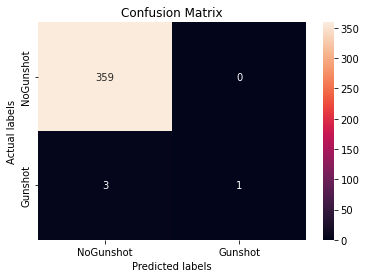

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

lables = ['NoGunshot','Gunshot']  
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables); ax.yaxis.set_ticklabels(lables)

Classification report   (Note: Gushot=1 and NoGunshot=0)

In [ ]:
from sklearn.metrics import classification_report
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       359
           1       1.00      0.25      0.40         4

   micro avg       0.99      0.99      0.99       363
   macro avg       1.00      0.62      0.70       363
weighted avg       0.99      0.99      0.99       363
 samples avg       0.99      0.99      0.99       363



Precision score on the test data using the actual values and the predicted values

In [ ]:

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, labels=[0,1], average='micro')
print(f'The precision score of the ResNet50 model is {round((precision*100),2)}%')

The precision score of the ResNet50 model is 99.17%


Recall score on the test data using the actual values and the predicted values

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, labels=[0,1], average='micro')
print(f'The recall score of the ResNet50 model is {round((recall*100),2)}%')

The recall score of the ResNet50 model is 99.17%


F1-score on the test data using the actual values and the predicted values

In [364]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred, labels=[0,1], average='micro')
print(f'The f1_score of ResNet50 model is {round((f1_score*100),2)}%')

The f1_score of ResNet50 model is 99.17%


#Creating pickle file to save the ResNet50 model

Creating pickle file to save the trained ResNet50 model

In [365]:
pickle.dump(my_RestNet50_model,open("/content/drive/MyDrive/Audio_dataset/ResNet50.dat","wb"))

INFO:tensorflow:Assets written to: ram://2110d702-ae8c-4c57-b2bb-3a6415a67ee5/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


loading the model for quick demo

In [368]:
ResNet_Trained_model=pickle.load(open("/content/drive/MyDrive/Audio_dataset/ResNet50.dat","rb"))